# Introduction to Qiskit and Connecting to IBM Quantum Computers

## IBM Quantum Computers: Technical Context
IBM's quantum computers are based on superconducting qubits. These qubits operate at cryogenic temperatures (close to absolute zero) to achieve superconductivity, where resistance disappears in certain materials.IBM's superconducting quantum computers operate at an ultra-low temperature of approximately 15 millikelvin (mK), which is equivalent to -459.63°F. This temperature is necessary to maintain the superconducting state of qubits by eliminating thermal noise and ensuring quantum coherence. The extreme cooling is achieved using dilution refrigerators, enabling the qubits to perform high-fidelity quantum operations while minimizing decoherence and noise. This technical capability is a cornerstone of IBM's quantum computing technology, allowing for stable quantum states essential for executing quantum algorithms effectively.

Superconducting qubits use Josephson junctions to enable quantum behavior. These junctions allow for the creation and manipulation of quantum states, such as superposition and entanglement.
IBM's quantum computers employ microwave pulses to control and measure qubits. Error correction and mitigation are critical challenges, and ongoing improvements are made to enhance qubit coherence times, gate fidelity, and overall system performance.

## 1. Installing Qiskit & some other things
I tested my code with Python 3.10.16 - so I know it atleast runs for this version successfully (perhaps it works on previous versions of Python). Use this notebook as a starting point to begin to understand how to make quantum circuits in Qiskit - and execute them with a simulator or real noisy intermediate scale quantum (NISQ) device. 

In [1]:
!pip install numpy
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install qiskit qiskit-ibm-runtime qiskit-ibm-provider seaborn --upgrade
!pip install pylatexenc
!pip install qiskit-aer


## 2. Getting an IBM Quantum Account
Follow these steps to get an IBM Quantum account:
1. Go to the [IBM Quantum Experience](https://quantum-computing.ibm.com/) and create an account on the "upgraded platform today" - IBM recently has moved their Quantum platform.
2. Sign up for an account (you can use your RIT email for example) or log in if you already have one.
3. Navigate to your account settings.
4. Create and copy your IBM Quantum API token.

## 3. Setting Up Qiskit to Connect to IBM Quantum
Save your IBM Quantum API token in a file named 'ibm_quantum_token.txt'.
The file should contain your token as a single line of text, for example:
`YOUR_API_TOKEN_HERE`
This avoids hardcoding the token directly into the notebook. Make an instance on ibm_quantum_platform  (I called my "Default" - feel free to name yours whatever - and make sure to set it to the instance variable below :) ). 

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Read the API token from the file.
with open('ibm_quantum_token.txt', 'r') as token_file:
    api_token = token_file.read().strip()

# Save the token to your Qiskit account configuration.

 
QiskitRuntimeService.save_account(channel="ibm_quantum_platform",instance="Default", token=api_token, set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()
print("Account loaded successfully!")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Account loaded successfully!


## Note on Usage Limitations
IBM Quantum provides free-tier access with monthly limitations on the number of jobs and runtime hours (10 minutes). Ensure to check your account's usage details in the IBM Quantum dashboard to avoid exceeding these limits. I expect for what we want to do during the course we may be close to reaching the monthly rate limit (to be determined).

## 4. Testing Connection to IBM Quantum Computers
This section lists all available backends (quantum computers and simulators) provided by IBM Quantum.
Ensure that your account is properly connected.

In [3]:


from qiskit.visualization import plot_gate_map, plot_error_map
import matplotlib.pyplot as plt

backends = service.backends()

print("Available backends:")
for backend in backends:
    # Print the name of each backend.
    print(backend)
    print((backend.name, backend.configuration().simulator, backend.status().operational))

Available backends:
<IBMBackend('ibm_brisbane')>
('ibm_brisbane', False, True)
<IBMBackend('ibm_torino')>
('ibm_torino', False, True)


## 5. Running a Simple Quantum Circuit
This section demonstrates creating and running a simple quantum circuit.

Quantum Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


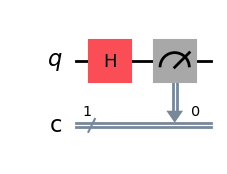

In [4]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit.visualization import plot_histogram

# Step 1: Create a simple quantum circuit with one qubit and one classical bit.
qc = QuantumCircuit(1, 1)  # Initialize a quantum circuit with 1 qubit and 1 classical bit.
qc.h(0)  # Apply a Hadamard gate to the qubit (creates a superposition state).
qc.measure(0, 0)  # Measure the state of the qubit and store the result in the classical bit.

# Visualize the circuit to understand its structure.
print("Quantum Circuit:")
print(qc)
qc.draw('mpl')  # Use matplotlib to render the circuit diagram.

## 6. Choosing a Backend and Running the Circuit
This step involves selecting a backend and running the quantum circuit.

In [5]:
import networkx as nx

import seaborn as sns

%matplotlib inline

# Step 2: Choose a backend to execute the circuit. Find the least busy backend with operational status and real quantum hardware
service = QiskitRuntimeService()
# Get a backend that is a real quantum device, and not a simulator
backend = service.least_busy(operational=True, simulator=False)
print(f"Least busy backend: {backend.name}")



print(f"Running on backend: {backend.name}")




# Extract backend properties (T1, T2, etc.)
backend_config = backend.configuration()
backend_properties = backend.properties()

# Collect qubit error rates

print("Backend Parameters:")
print(f"Qubit count: {backend_config.n_qubits}")
# T1 is the relaxation time, which measures how quickly a qubit loses its state due to interaction with the environment.
# Value Proposition of High T1:
# A higher T1 allows for longer quantum operations and reduces the likelihood of errors due to energy relaxation.
# This is especially valuable for deep quantum circuits or algorithms that require extended computation times.
# Challenges: Achieving high T1 is difficult due to environmental noise, energy dissipation, and material limitations in superconducting qubits.
print("T1 times (in microseconds):")
for i, qubit in enumerate(backend_properties.qubits):
    t1 = qubit[0].value  # T1 is the first property of each qubit.
    print(f"Qubit {i}: {t1:.1f} µs")

# T2 is the dephasing time, which measures how quickly a qubit loses coherence due to phase errors.
# Value Proposition of High T2:
# A higher T2 ensures that quantum states remain coherent for longer durations, enabling more accurate computations and reducing errors in quantum algorithms.
# This is critical for operations involving entanglement or interference patterns.
# Challenges: Achieving high T2 requires minimizing phase noise, which is influenced by material quality and external fluctuations.
print("T2 times (in microseconds):")
for i, qubit in enumerate(backend_properties.qubits):
    t2 = qubit[1].value  # T2 is the second property of each qubit.
    print(f"Qubit {i}: {t2:.1f} µs")

# T2* (T2 star) is an observed coherence time that includes inhomogeneous broadening effects.
# Value Proposition of High T2*:
# A high T2* value implies minimal inhomogeneous noise and better overall coherence in practical scenarios.
# This is important for algorithms sensitive to noise or for achieving high-fidelity gate operations.
# Challenges: T2* is generally lower than T2 due to environmental and fabrication imperfections, which are hard to eliminate completely.
print("T2* times (if available):")
for i, qubit in enumerate(backend_properties.qubits):
    t2_star = next((p.value for p in qubit if p.name == "T2*"), None)
    if t2_star:
        print(f"Qubit {i}: {t2_star:.1f} µs (T2 star)")
    else:
        print(f"Qubit {i}: T2* not available")

# Relationship between T1 and T2:
# T2 is always less than or equal to 2*T1. This relationship arises because T2 includes the effects of T1 (energy relaxation)
# as well as additional dephasing mechanisms. T2* is generally less than T2 due to inhomogeneous broadening effects.
print("Relationship between T1, T2, and T2*: T2 <= 2*T1 and T2* <= T2")

# Exhaustive demonstration of all qubit parameters:
print("Exhaustive qubit parameters:")
for i, qubit in enumerate(backend_properties.qubits):
    print(f"Qubit {i} parameters:")
    for param in qubit:
        print(f" - {param.name}: {param.value} {param.unit}")
        # Add a description of each parameter's importance:
        if param.name == "T1":
            print("   (T1: Relaxation time, defines qubit longevity)")
        elif param.name == "T2":
            print("   (T2: Dephasing time, defines qubit coherence)")
        elif param.name == "T2*":
            print("   (T2*: Observed coherence time, includes inhomogeneous effects)")
        elif param.name == "frequency":
            print("   (Frequency: Resonance frequency of the qubit, important for addressing and control)")
        elif param.name == "anharmonicity":
            print("   (Anharmonicity: Difference in energy levels, impacts gate fidelity and control)")
        else:
            print("   (Other parameter)")

Least busy backend: ibm_brisbane
Running on backend: ibm_brisbane
Backend Parameters:
Qubit count: 127
T1 times (in microseconds):
Qubit 0: 279.1 µs
Qubit 1: 323.1 µs
Qubit 2: 161.6 µs
Qubit 3: 252.5 µs
Qubit 4: 290.4 µs
Qubit 5: 182.7 µs
Qubit 6: 203.8 µs
Qubit 7: 237.0 µs
Qubit 8: 187.8 µs
Qubit 9: 319.1 µs
Qubit 10: 260.4 µs
Qubit 11: 285.8 µs
Qubit 12: 324.4 µs
Qubit 13: 383.2 µs
Qubit 14: 225.3 µs
Qubit 15: 122.8 µs
Qubit 16: 357.7 µs
Qubit 17: 214.7 µs
Qubit 18: 294.4 µs
Qubit 19: 400.1 µs
Qubit 20: 271.5 µs
Qubit 21: 306.4 µs
Qubit 22: 159.2 µs
Qubit 23: 315.2 µs
Qubit 24: 221.8 µs
Qubit 25: 250.7 µs
Qubit 26: 283.8 µs
Qubit 27: 261.8 µs
Qubit 28: 170.0 µs
Qubit 29: 431.8 µs
Qubit 30: 264.3 µs
Qubit 31: 253.0 µs
Qubit 32: 253.9 µs
Qubit 33: 303.2 µs
Qubit 34: 297.0 µs
Qubit 35: 294.7 µs
Qubit 36: 274.4 µs
Qubit 37: 242.6 µs
Qubit 38: 215.5 µs
Qubit 39: 247.7 µs
Qubit 40: 300.4 µs
Qubit 41: 261.2 µs
Qubit 42: 262.1 µs
Qubit 43: 280.9 µs
Qubit 44: 278.1 µs
Qubit 45: 125.2 µs
Qubit

## 7. Executing the Circuit and Displaying Results
Here we execute our circuit both using a simulator and a real NISQ. We run the circuit 4000 times. We know from theory that 50% of the time we should measure the 0 state and 50% of the time we should measure the 1 state. This means in a perfect world we would expect to see 2000 shots being measured in the 0 state and 2000 shots being measured in the 1 state.

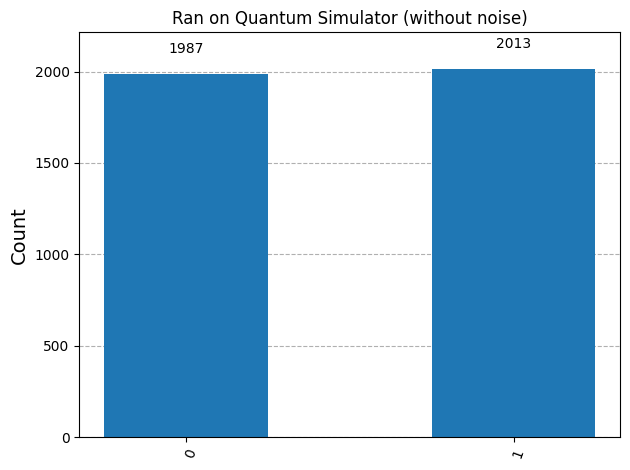

In [6]:
#run the circuit with a sampler (simulator)


from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(qc,shots=4000).result()
plot_histogram(result_ideal.get_counts(0),title="Ran on Quantum Simulator (without noise)")





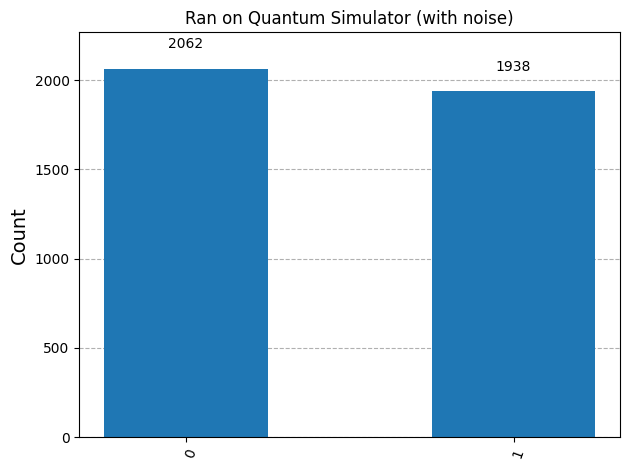

In [7]:
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
 
# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}

sampler = Sampler(mode=fake_manila, options=options)

results = sampler.run([isa_qc], shots=4000).result()
counts=results[0].data.c.get_counts()


plot_histogram(counts, title ="Ran on Quantum Simulator (with noise)")


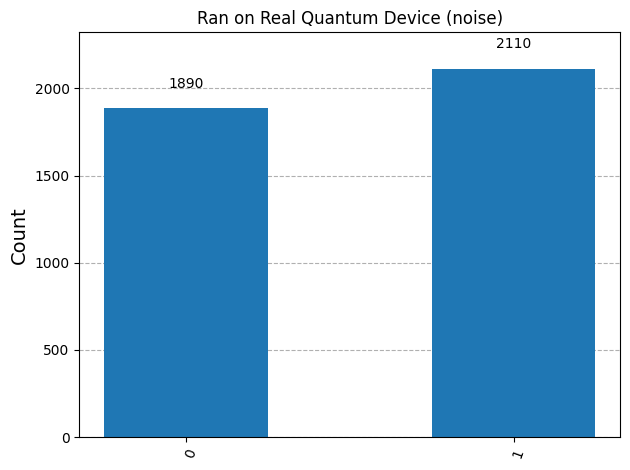

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_circuit = pm.run(qc)
 
# You can use auto-complete to see and complete the options.
sampler.options.default_shots = 4000 

# Get a backend

 
job = sampler.run([qc_circuit])
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]

counts= pub_result.data.c.get_counts()
plot_histogram(counts, title ="Ran on Real Quantum Device (noise)")
